In [1]:
#Upload the preprocessed data into Notebook 3
from google.colab import files
uploaded = files.upload()

Saving X_test.pkl to X_test.pkl
Saving X_train_res.pkl to X_train_res.pkl
Saving y_test.pkl to y_test.pkl
Saving y_train_res.pkl to y_train_res.pkl


In [2]:
#Load them
import pickle

X_train_res = pickle.load(open('X_train_res.pkl', 'rb'))
y_train_res = pickle.load(open('y_train_res.pkl', 'rb'))
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

In [4]:
#Verify Shapes
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 44)
(1972,)
(294, 44)
(294,)


In [5]:
#Now begin Modeling
#Logistic Regression.

Accuracy: 0.7755102040816326
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       247
           1       0.37      0.60      0.46        47

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.78      0.79       294



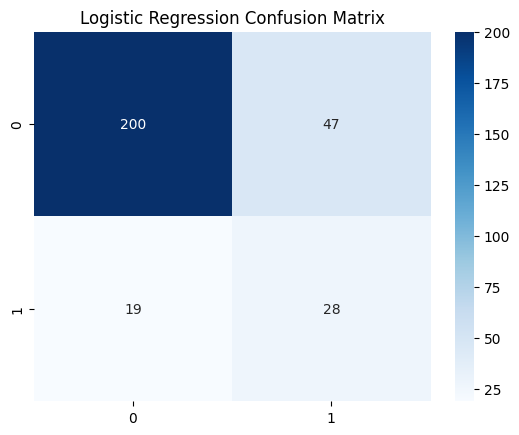

In [9]:
#Add:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)

y_pred_log = log_model.predict(X_test)

#Evaluate:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


#confusion matrix:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [10]:
#Train the Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [12]:
#Predict
y_pred_dt = dt_model.predict(X_test)

In [13]:
#Evaluate Performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8129251700680272
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.41      0.40      0.41        47

    accuracy                           0.81       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.81      0.81      0.81       294



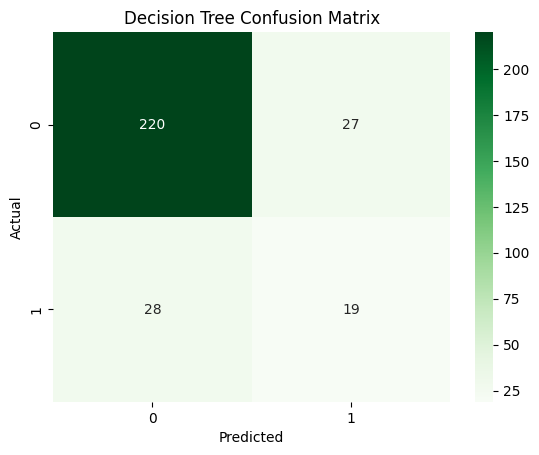

In [14]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
#Feature Importance (VERY IMPORTANT for your project!)
import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    'feature': X_train_res.columns,
    'importance': dt_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(15)

,feature,importance
43,OverTime_Yes,0.351695
22,YearsWithCurrManager,0.136696
15,StockOptionLevel,0.106204
7,JobLevel,0.086294
0,Age,0.062797
8,JobSatisfaction,0.062676
11,NumCompaniesWorked,0.038279
18,WorkLifeBalance,0.030457
6,JobInvolvement,0.029310
26,Department_Sales,0.018568


In [18]:
#Random Forest Code

In [21]:
#Train
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [22]:
#Predict:
y_pred_rf = rf_model.predict(X_test)

In [23]:
#Evaluate:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.50      0.30      0.37        47

    accuracy                           0.84       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.82      0.84      0.82       294



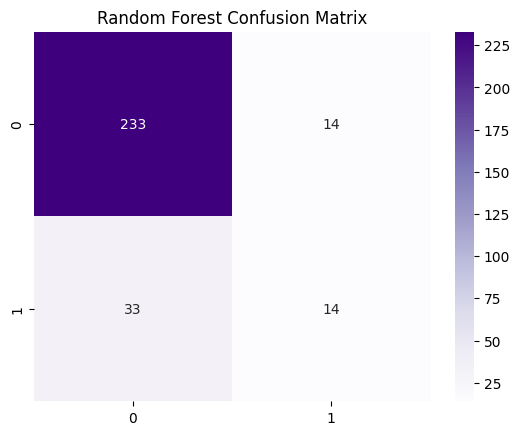

In [24]:
#Confusion Matrix:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Purples")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [26]:
#Feature Importance:
rf_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_importance.head(15)

,Feature,Importance
43,OverTime_Yes,0.113940
22,YearsWithCurrManager,0.063530
15,StockOptionLevel,0.062402
8,JobSatisfaction,0.049770
19,YearsAtCompany,0.047347
9,MonthlyIncome,0.041785
0,Age,0.040507
20,YearsInCurrentRole,0.039799
16,TotalWorkingYears,0.039739
7,JobLevel,0.039336


In [28]:
#XGBoost Classifier
!pip install xgboost
from xgboost import XGBClassifier


In [29]:
#Train XGBoost


xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
#Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.65      0.28      0.39        47

    accuracy                           0.86       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.84      0.86      0.84       294



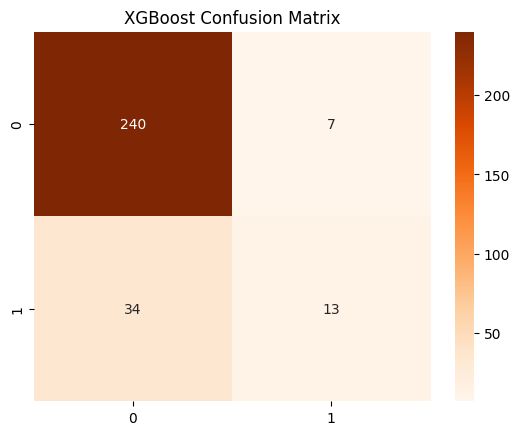

In [31]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [32]:
#Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

xgb_importance.head(15)

,Feature,Importance
43,OverTime_Yes,0.112346
15,StockOptionLevel,0.069078
7,JobLevel,0.054415
22,YearsWithCurrManager,0.050845
8,JobSatisfaction,0.037291
4,EnvironmentSatisfaction,0.033142
6,JobInvolvement,0.030044
26,Department_Sales,0.029629
16,TotalWorkingYears,0.027848
42,MaritalStatus_Single,0.026885


In [33]:
#Collect All Model Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision (Attrition=1)": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall (Attrition=1)": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score (Attrition=1)": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

import pandas as pd
results_df = pd.DataFrame(metrics)
results_df

,Model,Accuracy,Precision (Attrition=1),Recall (Attrition=1),F1 Score (Attrition=1)
0,Logistic Regression,0.775510,0.373333,0.595745,0.459016
1,Decision Tree,0.812925,0.413043,0.404255,0.408602
2,Random Forest,0.840136,0.500000,0.297872,0.373333
3,XGBoost,0.860544,0.650000,0.276596,0.388060


/tmp/ipython-input-1883000193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")


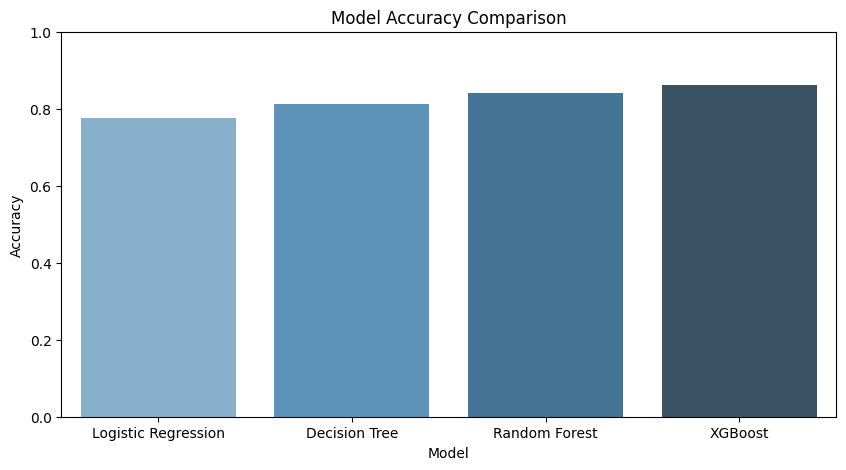

In [34]:
#Comparison Bar Plots
#Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-815608635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Precision (Attrition=1)", data=results_df, palette="Greens_d")


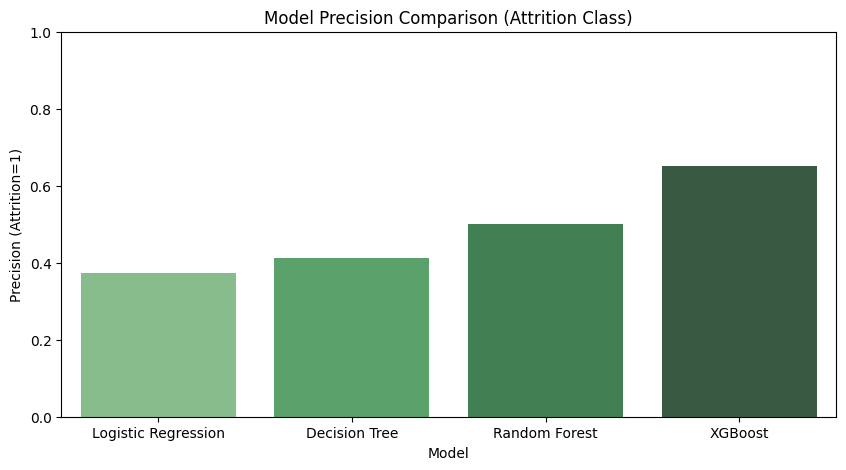

In [36]:
#Precision Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Precision (Attrition=1)", data=results_df, palette="Greens_d")
plt.title("Model Precision Comparison (Attrition Class)")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-2994110766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Recall (Attrition=1)", data=results_df, palette="Reds_d")


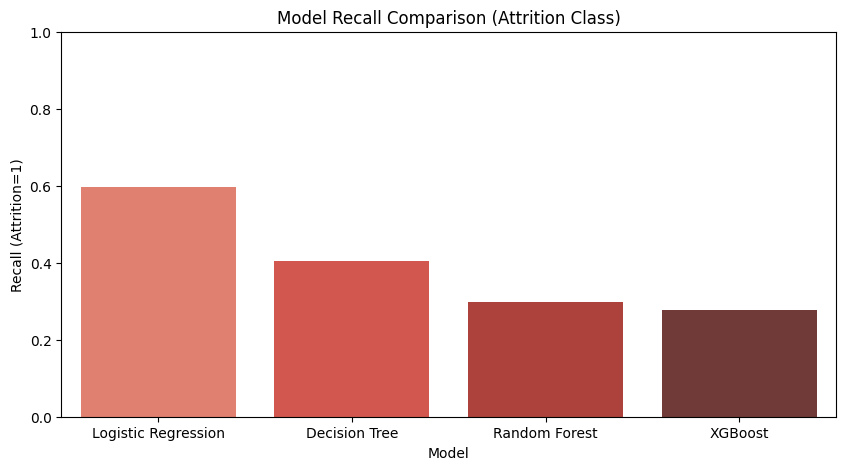

In [37]:
#Recall Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Recall (Attrition=1)", data=results_df, palette="Reds_d")
plt.title("Model Recall Comparison (Attrition Class)")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-2588869657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score (Attrition=1)", data=results_df, palette="Purples_d")


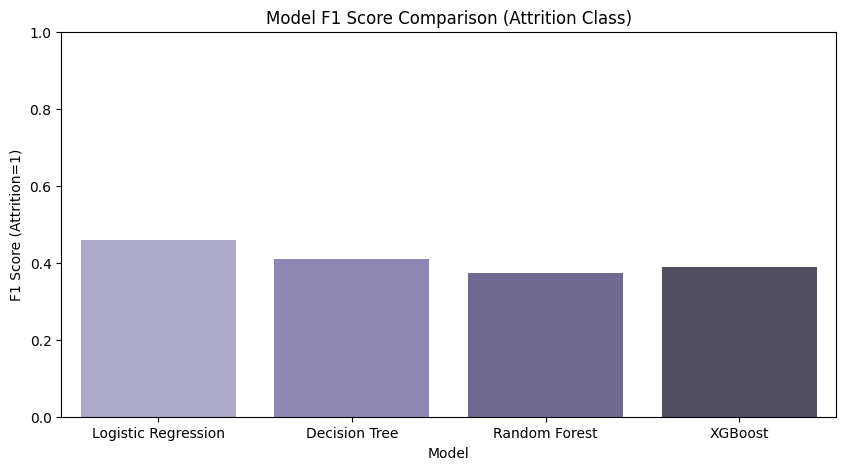

In [38]:
#F1 Score Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1 Score (Attrition=1)", data=results_df, palette="Purples_d")
plt.title("Model F1 Score Comparison (Attrition Class)")
plt.ylim(0,1)
plt.show()

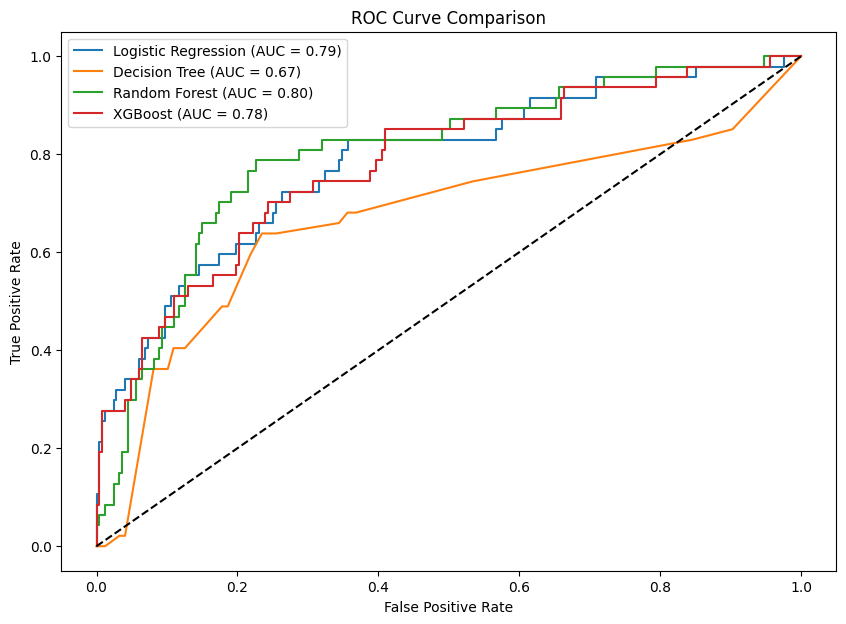

In [39]:
#ROC Curves (Great for Slides)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,7))

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

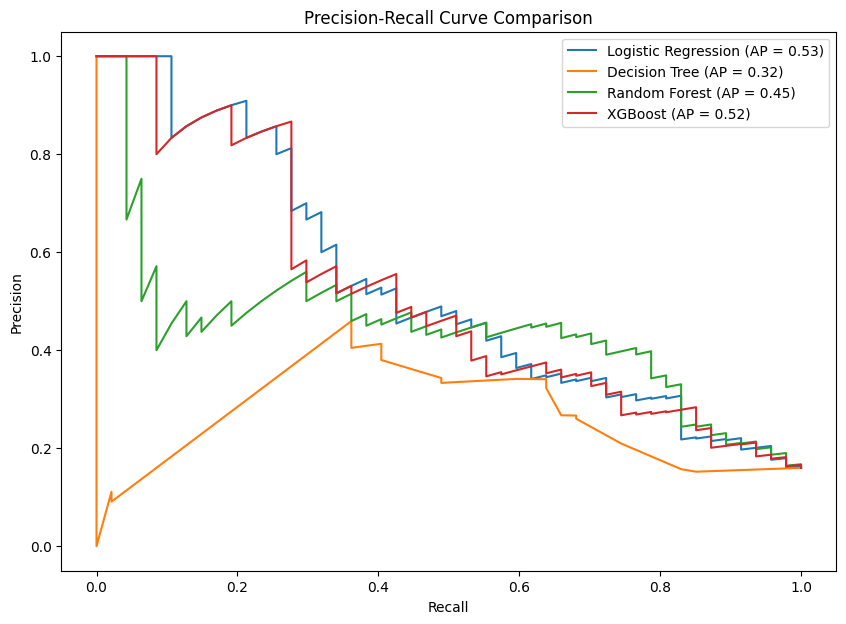

In [40]:
#Precision–Recall Curves

#Very important for imbalanced datasets.

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10,7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()